In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("Netflix Userbase.csv")

In [3]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
data.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [7]:
#check if any rows contain null's 
data.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [14]:
#lets group by some columns for better analysis 
#avg revenue by subscription type 
avg_revenue_by_subscription=data.groupby("Subscription Type")["Monthly Revenue"].mean()

In [9]:
avg_revenue_by_subscription

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

In [10]:
user_count_by_country=data.groupby("Country")["User ID"].count()

In [11]:
user_count_by_country

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

In [12]:
median_age_by_planduration=data.groupby("Plan Duration")["Age"].median()

In [13]:
median_age_by_planduration

Plan Duration
1 Month    39.0
Name: Age, dtype: float64

In [15]:
#find median age of users for a specific subscription type 
median_age_by_Subscriptontype=data.groupby("Subscription Type")["Age"].median()

In [16]:
median_age_by_Subscriptontype

Subscription Type
Basic       39.0
Premium     38.0
Standard    39.0
Name: Age, dtype: float64

In [17]:
total_revenue_by_gender=data.groupby("Gender")["Monthly Revenue"].sum()

In [19]:
total_revenue_by_gender
#female generates more revenue

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64

In [20]:
avg_age_by_device=data.groupby("Device")["Age"].mean()

In [21]:
avg_age_by_device

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64

In [22]:
#laptop users are somewhat older not significant though!

In [23]:
#now lets visualize for better understading of insights 

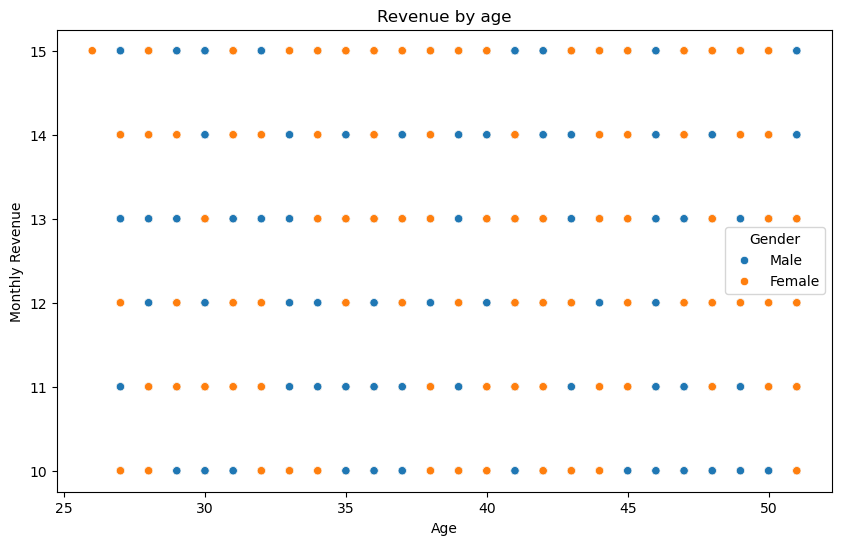

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Monthly Revenue",hue="Gender",data=data)
plt.xlabel("Age")
plt.ylabel("Monthly Revenue")
plt.title("Revenue by age")
plt.show()

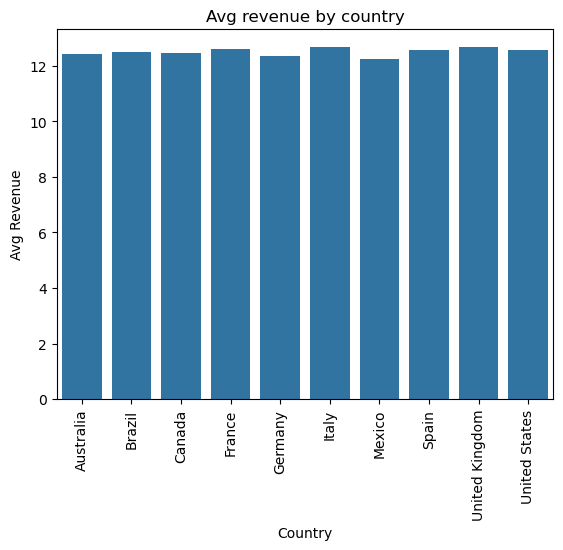

In [29]:
avg_revenue_by_country=data.groupby("Country")["Monthly Revenue"].mean().reset_index()
sns.barplot(x="Country",y="Monthly Revenue",data=avg_revenue_by_country)
plt.title("Avg revenue by country")
plt.xlabel("Country")
plt.ylabel("Avg Revenue")
plt.xticks(rotation=90)#for readability of x axis labels
plt.show()

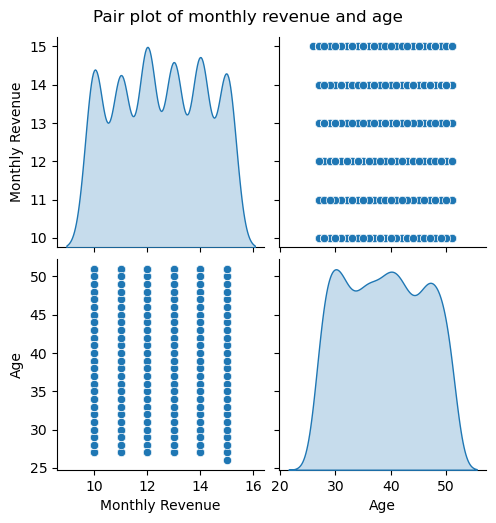

In [31]:
numerical_col=["Monthly Revenue","Age"]
sns.pairplot(data[numerical_col],diag_kind="kde")
plt.suptitle("Pair plot of monthly revenue and age",y=1.03)
plt.show()

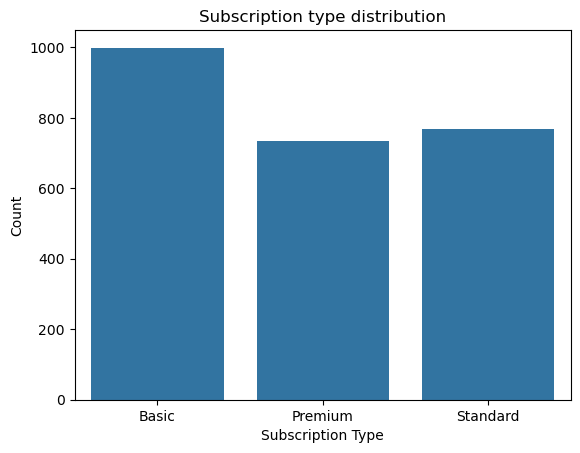

In [32]:
sns.countplot(x="Subscription Type",data=data)
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.title("Subscription type distribution")
plt.show()

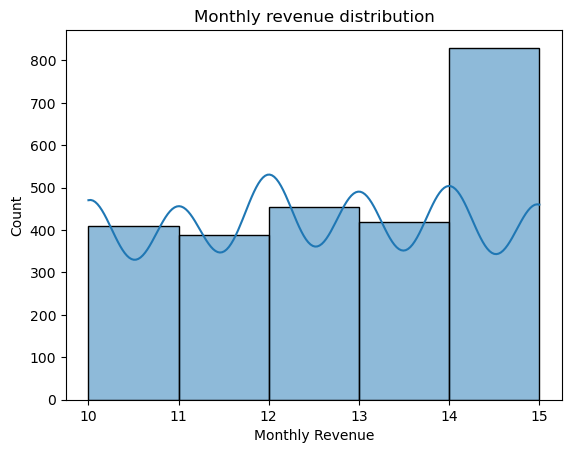

In [33]:
sns.histplot(data["Monthly Revenue"],bins=5,kde=True)
plt.title("Monthly revenue distribution")
plt.xlabel("Monthly Revenue")
plt.ylabel("Count")
plt.show()

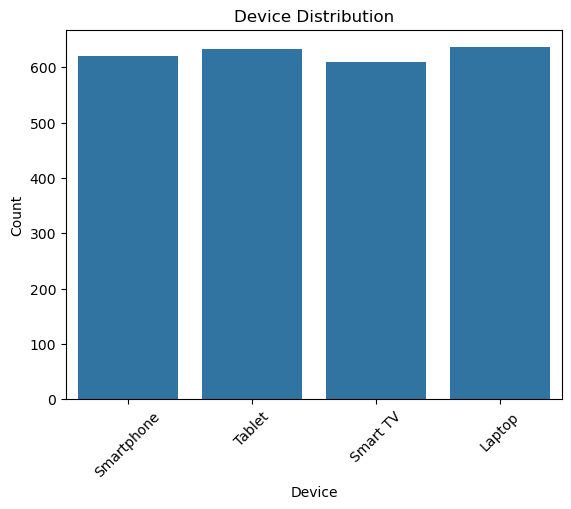

In [34]:
sns.countplot(x="Device",data=data)
plt.title("Device Distribution")
plt.xlabel("Device")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

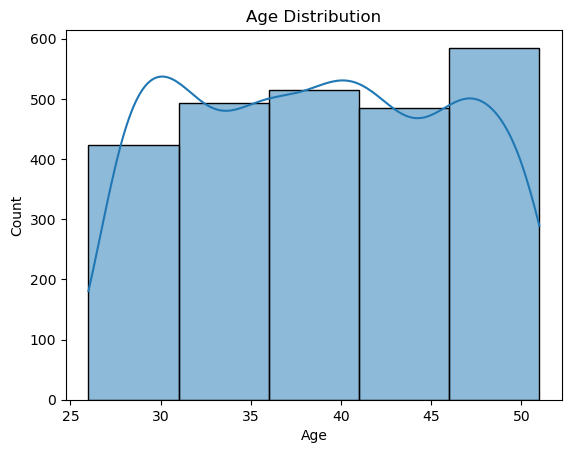

In [35]:
sns.histplot(data["Age"],bins=5,kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()